#  <span style="color:darkgreen">BUREAUCRACY INDICATORS</span>
<span style="color:seagreen">**2024 Tidytuesday  Week 18** </span>

##  Setup

### Libraries

In [51]:
%load_ext autoreload
%autoreload

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [54]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

#rcParams['font.family'] = 'Roboto'
plt.rcParams['font.family'] = 'Times New Roman'#

###  Data

In [52]:
dd = pd.read_csv('edu_job.csv')
dd.head()

,year,a3,a2,name,edu_level,category,group,value,class
0,2000,AGO,ao,Angola,No Education,Overall,Overall,0.072813,Private
1,2008,AGO,ao,Angola,No Education,Overall,Overall,0.098992,Private
2,2014,AGO,ao,Angola,No Education,Overall,Overall,0.072895,Private
3,2000,AGO,ao,Angola,No Education,Overall,Overall,0.037012,Public
4,2008,AGO,ao,Angola,No Education,Overall,Overall,0.073759,Public


## Data Wrangling

In [4]:
dd.describe()

,year,value
count,1349.000000,1349.000000
mean,2009.085248,0.301776
std,4.944889,0.231723
min,2000.000000,0.000000
25%,2005.000000,0.103021
50%,2010.000000,0.259089
75%,2013.000000,0.460658
max,2020.000000,1.000000


In [14]:
dd_te= dd[dd.edu_level == 'Tertiary Education']
dd_te.head(4)

,year,a3,a2,name,edu_level,category,group,value,class
18,2000,AGO,ao,Angola,Tertiary Education,Overall,Overall,0.033420,Private
19,2008,AGO,ao,Angola,Tertiary Education,Overall,Overall,0.116484,Private
20,2014,AGO,ao,Angola,Tertiary Education,Overall,Overall,0.115511,Private
21,2000,AGO,ao,Angola,Tertiary Education,industry,Education,0.184386,Private


**Subset values for all countries for health workers in public:**

In [105]:
ddgh =  dd_te[dd_te['class'] == 'Public']
ddgp  = ddgh[ddgh.group != 'Overall']
ddgp.head()

,year,a3,a2,name,edu_level,category,group,value,class
34,2000,AGO,ao,Angola,Tertiary Education,industry,Core Public Administration,0.116595,Public
35,2008,AGO,ao,Angola,Tertiary Education,industry,Core Public Administration,0.102926,Public
36,2014,AGO,ao,Angola,Tertiary Education,industry,Core Public Administration,0.265777,Public
37,2000,AGO,ao,Angola,Tertiary Education,industry,Education,0.088881,Public
38,2008,AGO,ao,Angola,Tertiary Education,industry,Education,0.239761,Public


**Aggregate by name and group for all years**

In [104]:
ddf  = ddgp.groupby(['name', 'group'])['value'].mean().reset_index()
ddf.head()

,name,group,value
0,Angola,Core Public Administration,0.161766
1,Angola,Education,0.213021
2,Angola,Health,0.127014
3,Angola,Medical workers,0.193088
4,Angola,Public Administration,0.161224


In [103]:
#ddgp  =  ddg[ddg['class'] == 'Public'].drop(['class'], axis=1)
#ddgp  = ddgp[ddgp.value  > 0]
#ddgp.head()

In [102]:
ddf[ddf.name  == 'Angola']

,name,value
0,Angola,0.148683


**Subset for only  Health and Medical  workers**

In [115]:
med_workers_public = ddf[ddf.group.isin(['Medical workers', 'Health'])]

In [116]:
med_workers_public.head()

,name,group,value
2,Angola,Health,0.127014
3,Angola,Medical workers,0.193088
9,Botswana,Health,0.458428
10,Botswana,Medical workers,0.860111
13,Cameroon,Medical workers,0.692308


In [124]:
#mwp = med_workers_public.drop(['group'], axis=1).set_index('name')
med_df  =  med_workers_public.groupby('name')['value'].mean()
med_df.head()

name
Angola      0.160051
Botswana    0.659269
Cameroon    0.692308
Chad        0.191326
Comoros     0.622354
Name: value, dtype: float64

##  VIZ

### Custom axis function

<Axes: xlabel='name'>

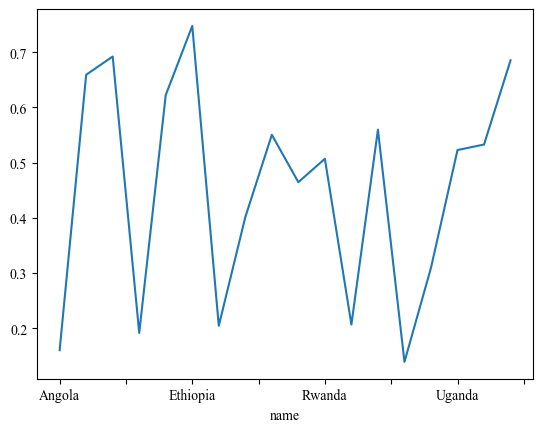

In [125]:
med_df.plot()

### Seaborn

In [126]:
dat = med_df.reset_index().sort_values('value', ascending = False)
dat

,name,value
5,Ethiopia,0.747777
2,Cameroon,0.692308
17,Zimbabwe,0.685440
1,Botswana,0.659269
4,Comoros,0.622354
12,South Africa,0.559754
8,Madagascar,0.550486
16,Zambia,0.532841
15,Uganda,0.522788
10,Rwanda,0.507016


In [111]:
dat  = dat[dat.value > 0]

**Barplot with  seaborn**

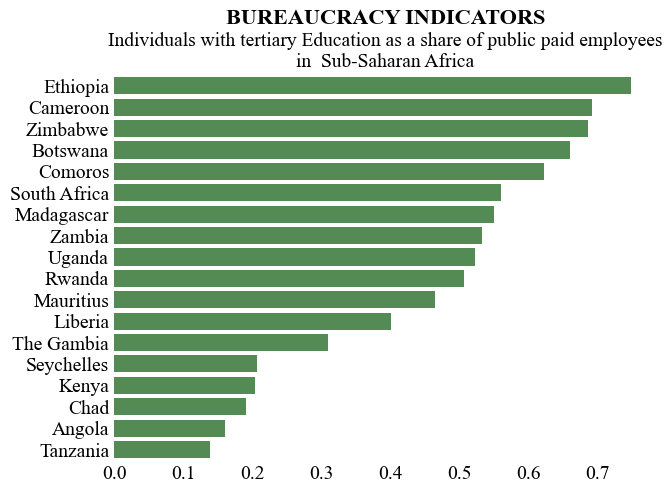

In [129]:

fig, ax = plt.subplots(figsize=(7,5))

sns.barplot(dat, x = 'value',   y = 'name', color = 'darkgreen', alpha  =.7)

ax.text(x=0.5, y=1.12, s='BUREAUCRACY INDICATORS', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.axes.set_title("BUREAUCRACY INDICATORS",fontsize=16)
ax.axes.set_title("Individuals with tertiary Education as a share of public paid employees\nin  Sub-Saharan Africa",fontsize=14)
#ax.set_xlabel("Individuals with tertiary Education as a share of\npublic paid employees",fontsize=12)
ax.set_ylabel(""), ax.set_xlabel("")
ax.set_facecolor('1')
ax.tick_params(labelsize=14, length=0)

[spine.set_visible(False) for spine in ax.spines.values()]

#ax.text(x=0.5, y=1.05, s='text text', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
#p.grid(True, axis='x', color='white')
#p.set_axisbelow(True)


plt.show()

In [70]:
nice_axes(p)
plt.show()

In [ ]:
title = 'BUREAUCRACY INDICATORS'
subtitle = 'Individuals with tertiary Education as a share of\npublic paid employees',